<a href="https://colab.research.google.com/github/QasimMahmood98/machinelearning/blob/main/Eye.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Importing data
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('17006903.csv')
df.head(7)

Saving 17006903.csv to 17006903 (5).csv


,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T
0,1,1,22,22,22,19,18,14,49.895756,17.775994,5.270920,0.771761,0.018632,0.006864,0.003923,0.003923,0.486903,0.100025,1,0
1,1,1,24,24,22,18,16,13,57.709936,23.799994,3.325423,0.234185,0.003903,0.003903,0.003903,0.003903,0.520908,0.144414,0,0
2,1,1,62,60,59,54,47,33,55.831441,27.993933,12.687485,4.852282,1.393889,0.373252,0.041817,0.007744,0.530904,0.128548,0,1
3,1,1,55,53,53,50,43,31,40.467228,18.445954,9.118901,3.079428,0.840261,0.272434,0.007653,0.001531,0.483284,0.114790,0,0
4,1,1,44,44,44,41,39,27,18.026254,8.570709,0.410381,0.000000,0.000000,0.000000,0.000000,0.000000,0.475935,0.123572,0,1
5,1,1,44,43,41,41,37,29,28.356400,6.935636,2.305771,0.323724,0.000000,0.000000,0.000000,0.000000,0.502831,0.126741,0,1
6,1,0,29,29,29,27,25,16,15.448398,9.113819,1.633493,0.000000,0.000000,0.000000,0.000000,0.000000,0.541743,0.139575,0,1


In [ ]:
#count nu
df.shape

(1150, 20)

In [ ]:
#count of number
df.isna().sum()

A    0
B    0
C    0
D    0
E    0
F    0
G    0
H    0
I    0
J    0
K    0
L    0
M    0
N    0
O    0
P    0
Q    0
R    0
S    0
T    0
dtype: int64

In [ ]:
#get 0 which is good or 1 which is not good
df['B'].value_counts() 

1    1056
0      94
Name: B, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


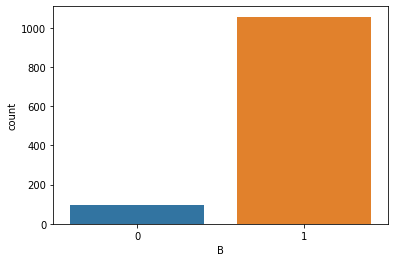

In [ ]:
#Visualise
sns.countplot(df['B'], label='Count')

In [ ]:
#looking at data types
df.dtypes

A      int64
B      int64
C      int64
D      int64
E      int64
F      int64
G      int64
H      int64
I    float64
J    float64
K    float64
L    float64
M    float64
N    float64
O    float64
P    float64
Q    float64
R    float64
S      int64
T      int64
dtype: object

In [ ]:
#encode categorical data values
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
df.iloc[:,1] = labelencoder_Y.fit_transform(df.iloc[:,1].values)

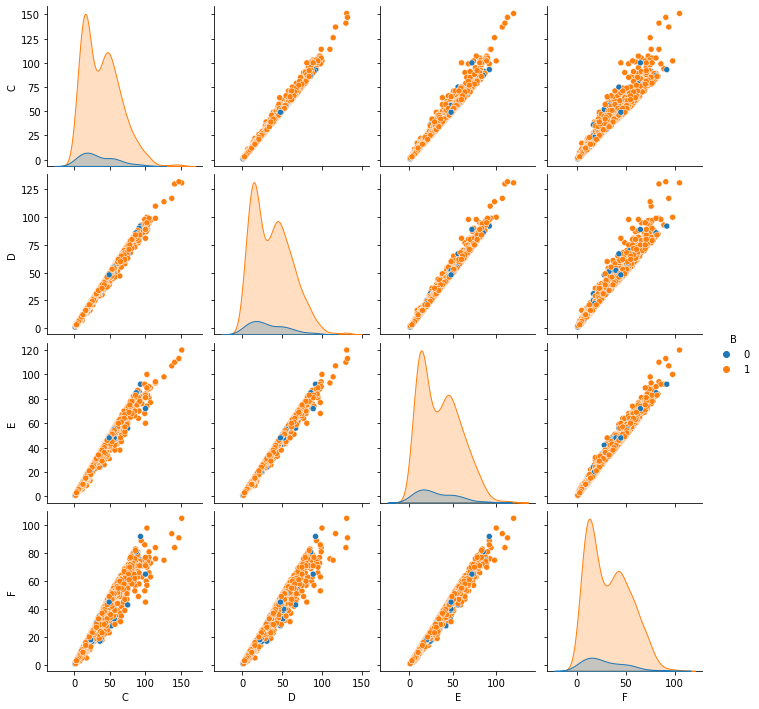

In [ ]:
#create a pair plot
sns.pairplot(df.iloc[:,1:6], hue="B")

In [ ]:
#print first 5 rows of new data
df.head(5)

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T
0,1,1,22,22,22,19,18,14,49.895756,17.775994,5.270920,0.771761,0.018632,0.006864,0.003923,0.003923,0.486903,0.100025,1,0
1,1,1,24,24,22,18,16,13,57.709936,23.799994,3.325423,0.234185,0.003903,0.003903,0.003903,0.003903,0.520908,0.144414,0,0
2,1,1,62,60,59,54,47,33,55.831441,27.993933,12.687485,4.852282,1.393889,0.373252,0.041817,0.007744,0.530904,0.128548,0,1
3,1,1,55,53,53,50,43,31,40.467228,18.445954,9.118901,3.079428,0.840261,0.272434,0.007653,0.001531,0.483284,0.114790,0,0
4,1,1,44,44,44,41,39,27,18.026254,8.570709,0.410381,0.000000,0.000000,0.000000,0.000000,0.000000,0.475935,0.123572,0,1


In [ ]:
#correlations 
df.iloc[:,1:12].corr()

,B,C,D,E,F,G,H,I,J,K,L
B,1.000000,0.053655,0.055200,0.053414,0.059413,0.060881,0.060462,0.062909,0.052660,0.053701,0.041731
C,0.053655,1.000000,0.996172,0.985711,0.963102,0.925190,0.859468,-0.229707,-0.103933,-0.045328,0.102625
D,0.055200,0.996172,1.000000,0.994214,0.977001,0.944444,0.883388,-0.244771,-0.116161,-0.059062,0.086059
E,0.053414,0.985711,0.994214,1.000000,0.991811,0.968644,0.916113,-0.283279,-0.140036,-0.087312,0.057322
F,0.059413,0.963102,0.977001,0.991811,1.000000,0.988284,0.947809,-0.310050,-0.160926,-0.110659,0.029313
G,0.060881,0.925190,0.944444,0.968644,0.988284,1.000000,0.974551,-0.349913,-0.198155,-0.153268,-0.020925
H,0.060462,0.859468,0.883388,0.916113,0.947809,0.974551,1.000000,-0.375610,-0.224539,-0.181876,-0.058612
I,0.062909,-0.229707,-0.244771,-0.283279,-0.310050,-0.349913,-0.375610,1.000000,0.767337,0.763579,0.486688
J,0.052660,-0.103933,-0.116161,-0.140036,-0.160926,-0.198155,-0.224539,0.767337,1.000000,0.919566,0.624448
K,0.053701,-0.045328,-0.059062,-0.087312,-0.110659,-0.153268,-0.181876,0.763579,0.919566,1.000000,0.780846


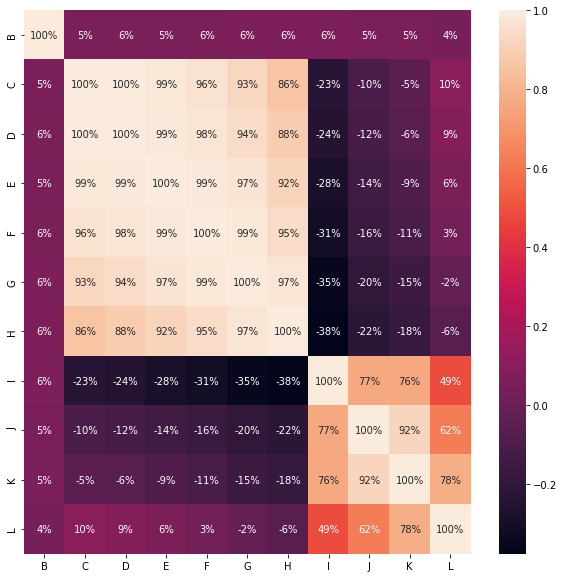

In [ ]:
#visualise
plt.figure(figsize=(10,10))
sns.heatmap(df.iloc[:,1:12].corr(), annot=True, fmt='.0%')

In [ ]:
#splitting into indep (x) And Dep (Y)
X = df.iloc[:,2:15].values #Features to determine if it has or not
Y = df.iloc[:,1].values #diagnosis

In [ ]:
#split data set into 50% training and 50% testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split (X,Y, test_size = 0.50, random_state=0)

In [ ]:
#scale the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)


In [ ]:
#function for models 
def models(X_train, Y_train):

  #logic regression model
  from sklearn.linear_model import LogisticRegression
  log = LogisticRegression(random_state=0)
  log.fit(X_train, Y_train)

  #decision making skills
  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier(criterion = 'entropy', random_state=0)
  tree.fit(X_train, Y_train)

  #Random Forest Classifier
  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state=0)
  forest.fit(X_train, Y_train)

  #print accuracy
  print('[0]Logistic Regression Training Accuracy:', log.score(X_train, Y_train))
  print('[1]Decision Tree classifier Training Accuracy:', tree.score(X_train, Y_train))
  print('[2]Random Forest classifier Training Accuracy:', forest.score(X_train, Y_train))
  
  return log, tree, forest

In [ ]:
#getting models
model = models (X_train,Y_train)

[0]Logistic Regression Training Accuracy: 0.9043478260869565
[1]Decision Tree classifier Training Accuracy: 1.0
[2]Random Forest classifier Training Accuracy: 0.9895652173913043


In [ ]:
#test data / testing model accuracy 
from sklearn.metrics import confusion_matrix

for i in range(len(model)):
  print('Model' ,i)
  cm = confusion_matrix(Y_test, model[i].predict(X_test))

  TP = cm [0][0]
  TN = cm [1][1]
  FN = cm [1][0]
  FP = cm [0][1]

  print(cm)
  print('Testing Accuracy = ', (TP + TN)/ (TP + TN + FN + FP))
  print()

Model 0
[[  0  39]
 [  0 536]]
Testing Accuracy =  0.9321739130434783

Model 1
[[  1  38]
 [ 41 495]]
Testing Accuracy =  0.8626086956521739

Model 2
[[  1  38]
 [ 10 526]]
Testing Accuracy =  0.9165217391304348



In [ ]:
# show another metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

for i in range(len(model)):
  print('Model' ,i)
  print(classification_report(Y_test, model[i].predict(X_test)))
  print(accuracy_score(Y_test, model[i].predict(X_test)))
  print()

Model 0
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        39
           1       0.93      1.00      0.96       536

    accuracy                           0.93       575
   macro avg       0.47      0.50      0.48       575
weighted avg       0.87      0.93      0.90       575

0.9321739130434783

Model 1
              precision    recall  f1-score   support

           0       0.02      0.03      0.02        39
           1       0.93      0.92      0.93       536

    accuracy                           0.86       575
   macro avg       0.48      0.47      0.48       575
weighted avg       0.87      0.86      0.86       575

0.8626086956521739

Model 2
              precision    recall  f1-score   support

           0       0.09      0.03      0.04        39
           1       0.93      0.98      0.96       536

    accuracy                           0.92       575
   macro avg       0.51      0.50      0.50       575
weighted a

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#printing prediction
pred = model[2].predict(X_test)
print (pred)
print()
print(Y_test)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 